In [45]:
import urllib.request
from bs4 import BeautifulSoup

In [46]:
##request the URL
url = "https://en.wikipedia.org/wiki/List_of_census_metropolitan_areas_and_agglomerations_in_Canada"
res = urllib.request.urlopen(url)

In [47]:
##read the data info from the url as a string
html = res.read()

In [48]:
##parse with BeautifulSoup
bs = BeautifulSoup(html, "html.parser")

In [49]:
tables = bs.find_all('table')
table = tables[0]

In [50]:
rows = table.find_all('tr')

In [51]:
columns = []
header_cells = rows[0].find_all("th")
for cell in header_cells:
    header = cell.text
    header = header.strip()
    header = header.replace("\n", "")
    columns.append(header)

columns

In [52]:
data = []
for row in rows[1:]:
    cells = row.find_all("td")
    
    ## create an empty tuple
    dt = ()
    for cell in cells:
        ##dp stands for "data point"
        dp = cell.text
        dp = dp.strip()
        dp = dp.replace("\n", "")
        
        ##add to tuple
        dt = dt + (dp,)
    data.append(dt)


In [60]:
data

[('1',
  '1',
  'Toronto (Mississauga, Brampton)',
  'Ontario',
  'CMA',
  '5,928,040',
  '5,583,064',
  '7000617897269313050♠+6.18%'),
 ('2',
  '2',
  'Montreal (Laval, Longueuil)',
  'Quebec',
  'CMA',
  '4,098,927',
  '3,934,078',
  '7000419028295829420♠+4.19%'),
 ('3',
  '3',
  'Vancouver (Surrey)',
  'British Columbia',
  'CMA',
  '2,463,431',
  '2,313,328',
  '7000648861726482370♠+6.49%'),
 ('4',
  '5',
  'Calgary',
  'Alberta',
  'CMA',
  '1,392,609',
  '1,214,839',
  '7001146332147716690♠+14.63%'),
 ('5',
  '4',
  'Ottawa–Gatineau',
  'Ontario/Quebec',
  'CMA',
  '1,323,783',
  '1,254,919',
  '7000548752548969300♠+5.49%'),
 ('6',
  '6',
  'Edmonton',
  'Alberta',
  'CMA',
  '1,321,426',
  '1,159,869',
  '7001139289005913600♠+13.93%'),
 ('7',
  '7',
  'Quebec City (Lévis)',
  'Quebec',
  'CMA',
  '800,296',
  '767,310',
  '7000429891438922990♠+4.30%'),
 ('8',
  '8',
  'Winnipeg',
  'Manitoba',
  'CMA',
  '778,489',
  '730,018',
  '7000663969929508590♠+6.64%'),
 ('9',
  '9',
  'H

In [61]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data, columns = columns)

In [62]:
df

,Rank(2016),Rank(2011),Geographic name,Province,Type,Population(2016),Population(2011),Change
0,1,1,"Toronto (Mississauga, Brampton)",Ontario,CMA,"5,928,040","5,583,064",7000617897269313050♠+6.18%
1,2,2,"Montreal (Laval, Longueuil)",Quebec,CMA,"4,098,927","3,934,078",7000419028295829420♠+4.19%
2,3,3,Vancouver (Surrey),British Columbia,CMA,"2,463,431","2,313,328",7000648861726482370♠+6.49%
3,4,5,Calgary,Alberta,CMA,"1,392,609","1,214,839",7001146332147716690♠+14.63%
4,5,4,Ottawa–Gatineau,Ontario/Quebec,CMA,"1,323,783","1,254,919",7000548752548969300♠+5.49%
5,6,6,Edmonton,Alberta,CMA,"1,321,426","1,159,869",7001139289005913600♠+13.93%
6,7,7,Quebec City (Lévis),Quebec,CMA,"800,296","767,310",7000429891438922990♠+4.30%
7,8,8,Winnipeg,Manitoba,CMA,"778,489","730,018",7000663969929508590♠+6.64%
8,9,9,Hamilton (Burlington),Ontario,CMA,"747,545","721,053",7000367407111543810♠+3.67%
9,10,10,Kitchener–Cambridge–Waterloo,Ontario,CMA,"523,894","496,383",7000554229294717989♠+5.54%


In [63]:
df.dtypes

Rank(2016)          object
Rank(2011)          object
Geographic name     object
Province            object
Type                object
Population(2016)    object
Population(2011)    object
Change              object
dtype: object

In [64]:
df['Population(2011)'] = df['Population(2011)'].str.replace(',', '')
df['Population(2011)'] = df['Population(2011)'].astype(np.int64)
df['Population(2011)'].mean()

181834.09210526315

In [65]:
df['Population(2016)'] = df['Population(2016)'].str.replace(',', '')
df['Population(2016)'] = df['Population(2016)'].astype(np.int64)
df['Population(2016)'].mean()

192322.0855263158

In [66]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

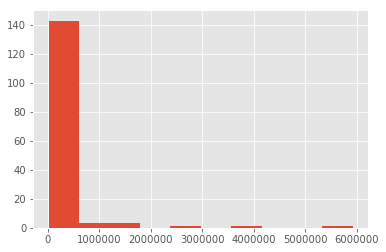

In [68]:
df['Population(2016)'].hist()

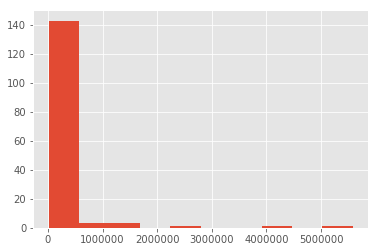

In [69]:
df['Population(2011)'].hist()

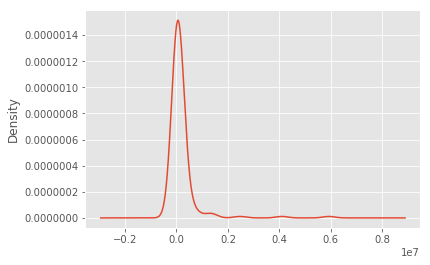

In [71]:
df['Population(2016)'].plot.kde()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a7fe518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11aaad2b0>]], dtype=object)

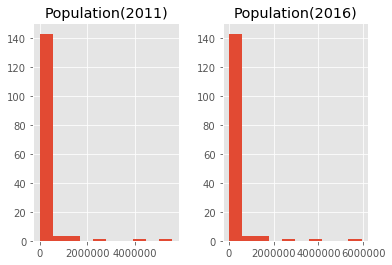

In [73]:
df[['Population(2016)', 'Population(2011)']].hist()